C:\Users\velez\AppData\Local\Temp\ipykernel_27888\3857618036.py:14: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(T, Z, 'r--', linewidth = 1, linestyle = 'dashed', label = "Ceros")


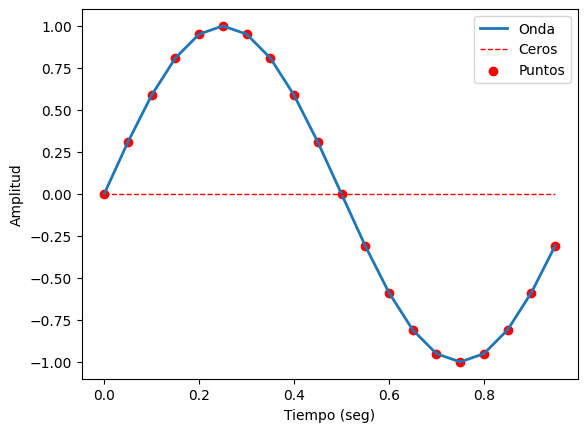

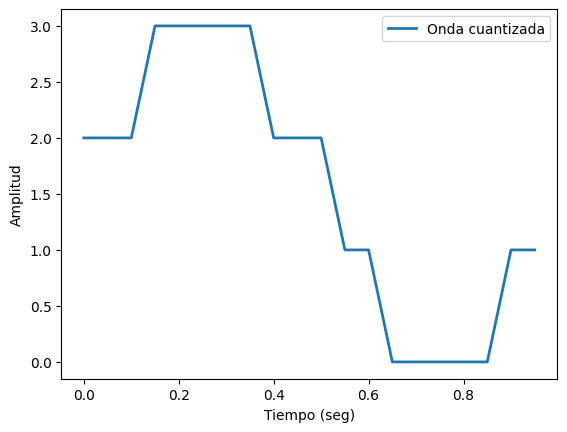

80 [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]


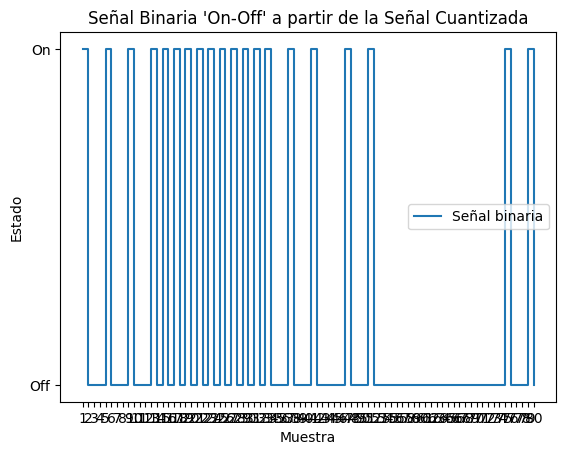

80 [1, 0, -1, 0, 1, 0, -1, 0, 1, 0, -1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, -1, 0, 1, 0, -1, 0, 1, 0, -1, 0, -1, 0, 1, 0, -1, 0, 1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, 1, 0, -1, 0, 1, 0]


C:\Users\velez\AppData\Local\Temp\ipykernel_27888\3857618036.py:70: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(x_ticks, x_zeros, 'r--', linewidth = 1, linestyle = 'solid', label = "Cero")


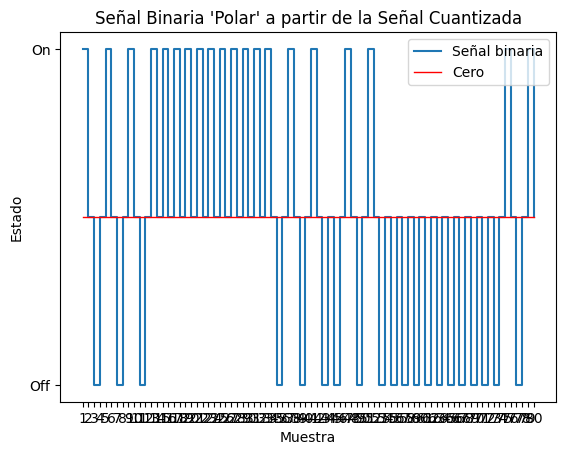

40 [1, 0, -1, 0, 1, 0, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 0, 1, 0, -1, 0, 0, 1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, -1]


C:\Users\velez\AppData\Local\Temp\ipykernel_27888\3857618036.py:98: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(x_ticks, x_zeros, 'r--', linewidth = 1, linestyle = 'solid', label = "Cero")


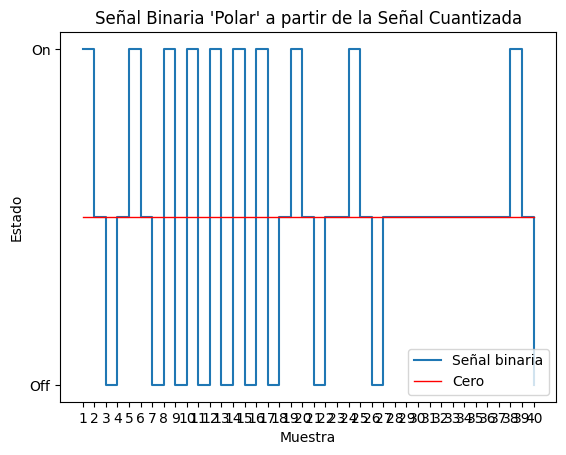

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import struct

FREO = 1
AMPLITUD = 1
FREM = 20
T = np.arange(0, 1, 1/FREM)
Z = np.zeros(T.size)
ONDA_SEN = AMPLITUD * np.sin(2 * np.pi * FREO * T)
ONDA_SEN

plt.plot(T, ONDA_SEN, label = "Onda", linewidth = 2)
plt.plot(T, Z, 'r--', linewidth = 1, linestyle = 'dashed', label = "Ceros")
plt.scatter(T, ONDA_SEN, marker='o', color = 'red', label = "Puntos")
plt.xlabel("Tiempo (seg)")
plt.ylabel("Amplitud")
plt.legend()
plt.show()

bits = 2
max_val = (2**bits) - 1

sen_cuantizada = np.round( ( (ONDA_SEN / AMPLITUD + 1) / 2 ) * max_val ).astype(int)
sen_cuantizada

plt.plot(T, sen_cuantizada, label = "Onda cuantizada", linewidth = 2)
plt.xlabel("Tiempo (seg)")
plt.ylabel("Amplitud")
plt.legend()
plt.show()

#On-Off
sen_bin = []
for i in sen_cuantizada:
    binario = format(i, '0'+str(bits)+'b')
    sen_bin.extend( map(int, binario))
    
intercalated_sen_bin = []
for val in sen_bin:
    intercalated_sen_bin.extend([val, 0])

x_ticks = np.arange(1, len(intercalated_sen_bin) + 1)
print(len(intercalated_sen_bin), intercalated_sen_bin)

plt.step(x_ticks, intercalated_sen_bin, where = 'post', label = 'Señal binaria')
plt.xlabel("Muestra")
plt.ylabel("Estado")
plt.title("Señal Binaria 'On-Off' a partir de la Señal Cuantizada")
plt.xticks(x_ticks)
plt.yticks([0, 1], ["Off", "On"])
plt.legend()
plt.show()

#polar
sen_bin = []
for i in sen_cuantizada:
    binario = format(i, "0"+str(bits)+"b")
    sen_bin.extend( map( lambda x: -1 if x == 0 else 1, map(int, binario) ) )

intercalated_sen_bin = []
for val in sen_bin:
    intercalated_sen_bin.extend([val, 0])

x_ticks = np.arange(1, len(intercalated_sen_bin) + 1)
x_zeros = np.zeros( len(x_ticks) )
print(len(intercalated_sen_bin), intercalated_sen_bin)

plt.step(x_ticks, intercalated_sen_bin, where = 'post', label = 'Señal binaria')
plt.plot(x_ticks, x_zeros, 'r--', linewidth = 1, linestyle = 'solid', label = "Cero")
plt.xlabel("Muestra")
plt.ylabel("Estado")
plt.title("Señal Binaria 'Polar' a partir de la Señal Cuantizada")
plt.xticks(x_ticks)
plt.yticks([-1, 1], ["Off", "On"])
plt.legend()
plt.show()

#Bipolar
sen_bin = []
uno = False
for i in sen_cuantizada:
    binario = format(i, "0"+str(bits)+"b")
    for x in map(int, binario) :
        if x == 0 : sen_bin.append(0)
        elif uno:
            sen_bin.append(-1)
            uno = False
        else:
            sen_bin.append(1)
            uno = True

x_ticks = np.arange(1, len(sen_bin) + 1)
x_zeros = np.zeros( len(x_ticks) )
print(len(sen_bin), sen_bin)

plt.step(x_ticks, sen_bin, where = 'post', label = 'Señal binaria')
plt.plot(x_ticks, x_zeros, 'r--', linewidth = 1, linestyle = 'solid', label = "Cero")
plt.xlabel("Muestra")
plt.ylabel("Estado")
plt.title("Señal Binaria 'Polar' a partir de la Señal Cuantizada")
plt.xticks(x_ticks)
plt.yticks([-1, 1], ["Off", "On"])
plt.legend()
plt.show()